In [1]:
from projet_etu import *
from mltools import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(nb, a, b, eps):
    """
    Génère nb points aléatoires en suivant une loi affine avec une perturbation gaussienne.
    nb: Le nombre de points à générer.
    a: Le coefficient directeur de la loi affine.
    b: L'ordonnée à l'origine de la loi affine.
    epsi: La variance de la perturbation gaussienne.

    Return x: Un tableau numpy de forme (nb, 1) contenant les abscisses des points.
    Return y: Un tableau numpy de forme (nb, 1) contenant les ordonnées des points.
    """
    x = np.random.rand(nb, 1) * 10  # génère des points x aléatoires entre 0 et 10
    y = a * x + b + np.random.randn(nb, 1) * eps # calcule les valeurs y en ajoutant un bruit gaussien d'écart-type epsi
    return x, y

In [3]:
def plot_loss(iter,liste_loss):
    """
    Trace le graphe de l'évolution de la fonction de coût en fonction des itérations de la descente de gradient.

    iter: Le nombre d'itérations de la descente de gradient.
    liste_loss: La liste des valeurs de la fonction de coût à chaque itération.
    """
    plt.figure()
    plt.plot(np.arange(iter),liste_loss)
    plt.title("Loss")
    plt.xlabel("Iterations")
    plt.ylabel("loss")
    plt.show()

In [4]:
def plot_data_reg(datax, datay, yhat, bruit):
    """
    Trace le graphe des données générées et la prédiction de la régression linéaire.

    datax: Le tableau numpy des abscisses des points.
    datay: Le tableau numpy des ordonnées des points.
    yhat: Le tableau numpy des prédictions de la régression linéaire.
    bruit: La valeur de la variance de la perturbation gaussienne.
    """
    plt.figure()
    plt.scatter(datax,datay,label="data",color='blue', s=10)
    plt.plot(datax,yhat,color='red',label='predection')
    for i in range(len(datax)):
        if i%10 == 0 : 
            plt.plot([datax[i],datax[i]],[datay[i], yhat[i]], c="black", linewidth=1) 

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Regression (bruit {bruit}) ")
    plt.show()

    

In [5]:
def plot_front(testx, testy, yhat):
    """
    Trace la frontière de décision pour la classification binaire ainsi que les points de données d'entraînement.

    testx: Les données d'entrée de test.
    testy: Les étiquettes de classe réelles pour les données de test.
    yhat: Les étiquettes de classe prédites pour les données de test.

    """
    accuracy = np.where(testy == yhat,1,0).mean()
    plt.figure()
    plot_frontiere(testx, classif, step=100)
    plot_data(testx, testy.reshape(-1))
    plt.title("Classification (accuracy : "+str(accuracy)+")")
    plt.show()

In [6]:
def descente_grad(loss, module, datax, datay, iter, gradient_step):
    """
    Réalise la descente de gradient pour minimiser la fonction de coût.

    loss: L'objet qui représente la fonction de coût.
    module: L'objet qui représente le modèle de régression linéaire.
    datax: Le tableau numpy des abscisses des points.
    datay: Le tableau numpy des ordonnées des points.
    iter: Le nombre d'itérations de la descente de gradient.
    gradient_step: Le pas de la descente de gradient.
    
    Return liste_loss: La liste des valeurs de la fonction de coût à chaque itération.
    """
    liste_loss = []
    for _ in range(iter):
        # Forward
        forward_ = module.forward(datax)

        # Backward
        liste_loss.append(loss.forward(datay, forward_).mean())
        loss_backward = loss.backward(datay, forward_)
        delta_linear = module.backward_delta(datax, loss_backward)

        # Mise à jour
        module.backward_update_gradient(datax, loss_backward)
        module.update_parameters(gradient_step=gradient_step)
        module.zero_grad()

    return liste_loss

In [7]:
def predict_reg(datax):
    """
    Prédit les valeurs de sortie en fonction des entrées pour la régression linéaire.

    datax: Les données d'entrée.

    Return : Les prédictions de sortie.
    """
    return linear.forward(datax)

In [8]:
def classif(datax):
    """
    Prédit les étiquettes de classe en fonction des entrées pour la classification binaire.

    datax: Les données d'entrée.

    Return: Les étiquettes de classe prédites.
    """
    forward = linear.forward(datax)
    return np.where(forward >= 0.5,1, 0)


# Regression : sans bruit

In [9]:
# Création donnée et constantes : 
bruit = 1
nb_pts = 200
datax,datay = generate_data(nb_pts,5,6,bruit)
input = datax.shape[1]
output = 1
iter = 100
gradient_step = 1e-5

In [10]:
# Module linéaire et Loss
loss = MSELoss()
linear = Linear(input, output)

### Loss

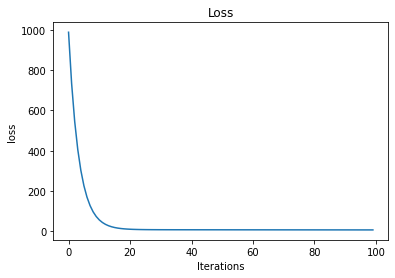

In [11]:
liste_loss = descente_grad(loss, linear, datax, datay, iter, gradient_step)
plot_loss(iter,liste_loss)

### Prédiction

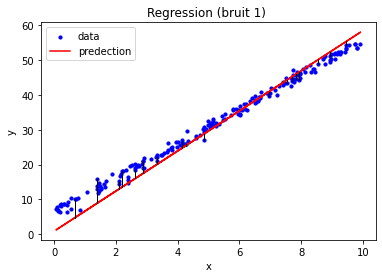

In [12]:
yhat = predict_reg(datax)
plot_data_reg(datax, datay, yhat, bruit)

# Regression : avec bruit

In [13]:
# Création donnée et constantes : 
bruit = 6
nb_pts = 200
datax,datay = generate_data(nb_pts,5,6,bruit)
input = datax.shape[1]
output = 1
iter = 100
gradient_step = 1e-5

In [14]:
# Module linéaire et Loss
loss = MSELoss()
linear = Linear(input, output)

### Loss

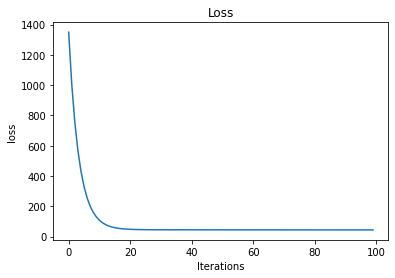

In [15]:
liste_loss = descente_grad(loss, linear, datax, datay, iter, gradient_step)
plot_loss(iter,liste_loss)

### Prédiction

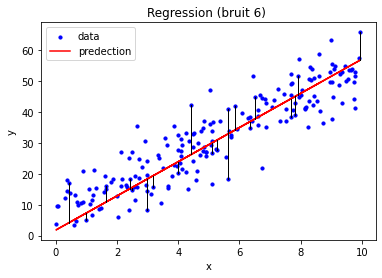

In [16]:
yhat = predict_reg(datax)
plot_data_reg(datax, datay, yhat, bruit)

# Classifictaion : sans bruit

In [17]:
# Création donnée 
bruit = 0
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)
datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

In [18]:
# Paramètres
input = datax.shape[1]
output = 1
iter = 1000
gradient_step = 1e-5

In [19]:
# Création des classes Loss et Module
loss = MSELoss()
linear = Linear(input, output)

### Loss

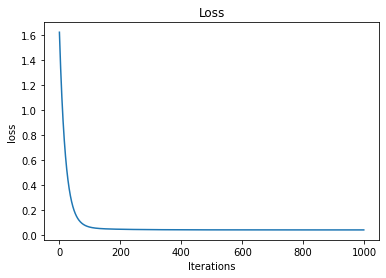

In [20]:
liste_loss = descente_grad(loss, linear, datax, datay, iter, gradient_step)
plot_loss(iter,liste_loss)

### Classification

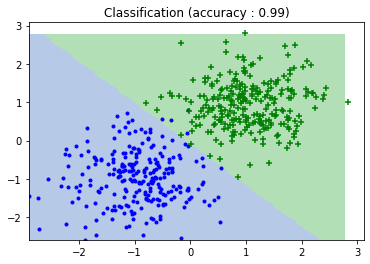

In [21]:
yhat = classif(testx)
plot_front(testx, testy, yhat)

# Classification : avec bruit

In [22]:
# Création donnée 
bruit = 2
datax, datay = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)
testx, testy = gen_arti(centerx=1, centery=1, sigma=0.4, nbex=500, data_type=0, epsilon=bruit)
datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

In [23]:
# Paramètres
input = datax.shape[1]
output = 1
iter = 1000
gradient_step = 1e-5

In [24]:
# Création des classes Loss et Module
loss = MSELoss()
linear = Linear(input, output)

### Loss

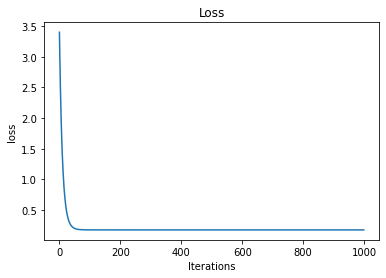

In [25]:
liste_loss = descente_grad(loss, linear, datax, datay, iter, gradient_step)
plot_loss(iter,liste_loss)

### Classification

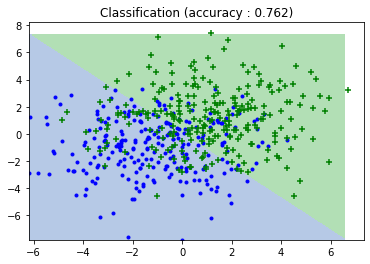

In [26]:
yhat = classif(testx)
plot_front(testx, testy, yhat)